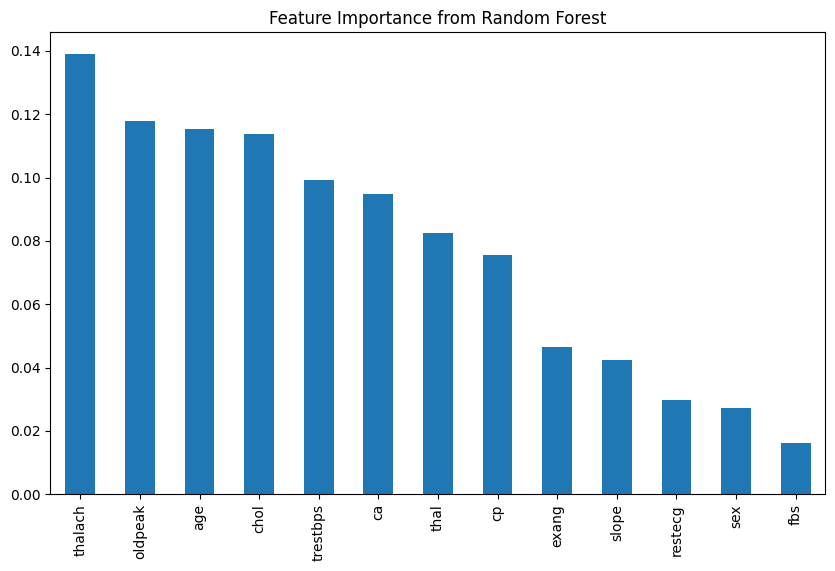

Selected features from RFE:
Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
Chi-square test results:
     Feature  Chi2 Score       p-value
12      thal   48.191147  8.610385e-10
8      exang   39.119182  6.582518e-08
11        ca   35.737851  3.276208e-07
9    oldpeak   15.887988  3.173210e-03
10     slope   13.533319  8.943579e-03
2         cp    7.991380  9.189448e-02
1        sex    7.511646  1.111968e-01
5        fbs    6.778461  1.480690e-01
6    restecg    6.513217  1.639595e-01
7    thalach    3.194716  5.257848e-01
0        age    1.244537  8.707128e-01
3   trestbps    0.637719  9.587814e-01
4       chol    0.177620  9.962823e-01


In [2]:
# 03_feature_selection.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler

# Load cleaned data
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1)
y = df['target']

# Feature importance via Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)
importances = model_rf.feature_importances_

feat_importance = pd.Series(importances, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
feat_importance.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.show()

# Recursive Feature Elimination (RFE)
rfe_selector = RFE(estimator=model_rf, n_features_to_select=8)
rfe_selector.fit(X, y)
selected_features = X.columns[rfe_selector.support_]

print("Selected features from RFE:")
print(selected_features)

# Chi-square test (requires non-negative features, scale to [0,1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi_scores, p_values = chi2(X_scaled, y)

chi_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'p-value': p_values})
chi_df = chi_df.sort_values(by='Chi2 Score', ascending=False)
print("Chi-square test results:")
print(chi_df)

# Save selected features list
selected_features.to_series().to_csv('../data/selected_features.csv', index=False)
